In [1]:
import cv2

In [2]:
!nvidia-smi

Wed Jul 15 20:52:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.92       Driver Version: 442.92       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX130      WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   42C    P8    N/A /  N/A |     37MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
os.chdir(r"F:/Data/")

In [3]:
path = 'cow.jpg'

In [4]:
img = cv2.imread(path)

In [5]:
img.shape

(1023, 1920, 3)

In [6]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [7]:
import matplotlib.pyplot as plt

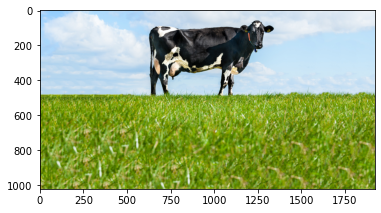

In [8]:
plt.imshow(img)

In [9]:
import torch
from torchvision import models

In [10]:
frcnn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True,progress=True)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )

In [12]:
device

device(type='cpu')

In [13]:
type(img)

numpy.ndarray

In [14]:
frcnn = frcnn.to(device)

In [15]:
frcnn.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [16]:
img_tensor = torch.tensor(img,dtype=torch.float)

In [17]:
img_tensor.shape

torch.Size([1023, 1920, 3])

In [18]:
device

device(type='cpu')

In [19]:
# to change the dimension, that is we place 2 on 0th dimension, 0 in 1st dimension,1 is 2nd dimension
img_tensor = img_tensor.permute(2,0,1)
img_tensor.shape

torch.Size([3, 1023, 1920])

In [20]:
# To expand the dimensions, adds one more bracket which expands the dimension
img_tensor = img_tensor.unsqueeze(axis=0)

In [21]:
# make sure that the data is normalized
img_tensor = img_tensor/img_tensor.max()

In [22]:
img_tensor = img_tensor.to(device)

In [23]:
import numpy as np

In [24]:
np.array([1,2]).shape

(2,)

In [25]:
np.array([[1,2],[3,4]]).shape

(2, 2)

In [26]:
np.array([[[1,2],[3,4]]]).shape

(1, 2, 2)

In [27]:
img[:,:,0].shape

(1023, 1920)

In [28]:
pred = frcnn(img_tensor)

C:\Users\Gowrav Tata\anaconda3\envs\cv\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [29]:
pred

[{'boxes': tensor([[ 637.7729,   74.5488, 1329.2548,  510.0794],
          [ 238.5822,  464.3848,  252.9837,  480.7674],
          [ 137.8988,  463.0373,  154.7592,  480.0115],
          [ 238.3983,  464.5887,  254.0623,  480.3631],
          [ 324.3780,  464.1413,  341.4114,  478.7348]], grad_fn=<StackBackward>),
  'labels': tensor([21, 16, 16,  9, 16]),
  'scores': tensor([0.9998, 0.3146, 0.0750, 0.0706, 0.0566], grad_fn=<IndexBackward>)}]

In [30]:
pred[0]['boxes']

tensor([[ 637.7729,   74.5488, 1329.2548,  510.0794],
        [ 238.5822,  464.3848,  252.9837,  480.7674],
        [ 137.8988,  463.0373,  154.7592,  480.0115],
        [ 238.3983,  464.5887,  254.0623,  480.3631],
        [ 324.3780,  464.1413,  341.4114,  478.7348]], grad_fn=<StackBackward>)

In [31]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [32]:
pred[0]['labels']

tensor([21, 16, 16,  9, 16])

In [33]:
pred[0]['scores']

tensor([0.9998, 0.3146, 0.0750, 0.0706, 0.0566], grad_fn=<IndexBackward>)

In [34]:
COCO_INSTANCE_CATEGORY_NAMES[21]

'cow'

In [35]:
lis = pred[0]['boxes'].cpu().detach().numpy()[0].tolist()

In [36]:
#all coordinates must be in integers
xmin,ymin,xmax,ymax = [int(x) for x in lis]

In [37]:
im = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(0,0,0),thickness=10)

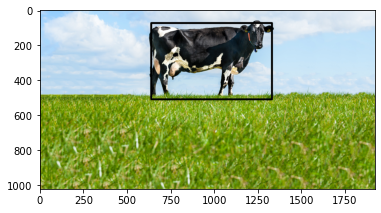

In [38]:
plt.imshow(im)